# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix,precision_score,f1_score,cohen_kappa_score,accuracy_score

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,roc_auc_score,roc_curve

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier




from IPython.display import Image

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor


from xgboost import XGBClassifier

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# 1. Data understanding

In [3]:
df = pd.read_excel('storedata_total.xlsx')
df.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


In [4]:
# Checking the shape of Dataframe
df.shape

(30801, 15)

In [5]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30781 non-null  object        
 1   retained    30801 non-null  int64         
 2   created     30781 non-null  datetime64[ns]
 3   firstorder  30781 non-null  object        
 4   lastorder   30781 non-null  object        
 5   esent       30801 non-null  int64         
 6   eopenrate   30801 non-null  float64       
 7   eclickrate  30801 non-null  float64       
 8   avgorder    30801 non-null  float64       
 9   ordfreq     30801 non-null  float64       
 10  paperless   30801 non-null  int64         
 11  refill      30801 non-null  int64         
 12  doorstep    30801 non-null  int64         
 13  favday      30801 non-null  object        
 14  city        30801 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 3.

In [6]:
# checking the null value 
df.isnull().sum()

custid        20
retained       0
created       20
firstorder    20
lastorder     20
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64

In [7]:
# removing the null values 

In [8]:
df.drop(index = df[df['lastorder'].isnull()].index.tolist(), axis = 0, inplace = True)
df.drop(index = df[df['firstorder'].isnull()].index.tolist(), axis = 0, inplace = True)

In [9]:
df.shape

(30781, 15)

In [10]:
df['firstorder'] = df['firstorder'].astype(str)
df['lastorder'] = df['lastorder'].astype(str)

In [11]:
df['firstorder'] = df['firstorder'].str[:10] 
df['lastorder'] = df['lastorder'].str[:10]

In [12]:
df.drop(index = df[df['firstorder'] == '1/0/00'].index.tolist(), axis = 0, inplace =True)
df.drop(index = df[df['lastorder'] == '1/0/00'].index.tolist(), axis = 0, inplace =True)
df.drop(index = df[df['firstorder'] == '00:00:00'].index.tolist(), axis = 0, inplace =True)
df.drop(index = df[df['lastorder'] == '00:00:00'].index.tolist(), axis = 0, inplace =True)

In [13]:
df.shape

(30747, 15)

In [14]:
from datetime import datetime
df['firstorder'] = df['firstorder'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['lastorder'] = df['lastorder'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30747 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30747 non-null  object        
 1   retained    30747 non-null  int64         
 2   created     30747 non-null  datetime64[ns]
 3   firstorder  30747 non-null  datetime64[ns]
 4   lastorder   30747 non-null  datetime64[ns]
 5   esent       30747 non-null  int64         
 6   eopenrate   30747 non-null  float64       
 7   eclickrate  30747 non-null  float64       
 8   avgorder    30747 non-null  float64       
 9   ordfreq     30747 non-null  float64       
 10  paperless   30747 non-null  int64         
 11  refill      30747 non-null  int64         
 12  doorstep    30747 non-null  int64         
 13  favday      30747 non-null  object        
 14  city        30747 non-null  object        
dtypes: datetime64[ns](3), float64(4), int64(5), object(3)
memory usage: 3.

In [16]:
df_num = df.select_dtypes(include=np.number)
df_num.columns

Index(['retained', 'esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq',
       'paperless', 'refill', 'doorstep'],
      dtype='object')

In [17]:
df_cat = df.select_dtypes(include=object)
df_cat.columns

Index(['custid', 'favday', 'city'], dtype='object')

In [18]:
df.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000
mean,0.794647,28.137314,25.559618,5.676134,61.848928,0.037769,0.649234,0.095034,0.038931
std,0.403966,16.751679,29.558790,10.567226,40.956758,0.103998,0.477218,0.293266,0.193433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.083333,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.960000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,42.000000,40.000000,7.142857,74.260000,0.040917,1.000000,0.000000,0.000000
max,1.000000,291.000000,100.000000,100.000000,2600.140000,3.250000,1.000000,1.000000,1.000000


In [19]:
# max value in esent  which could be a outlier
# avgorder could have potential outliers


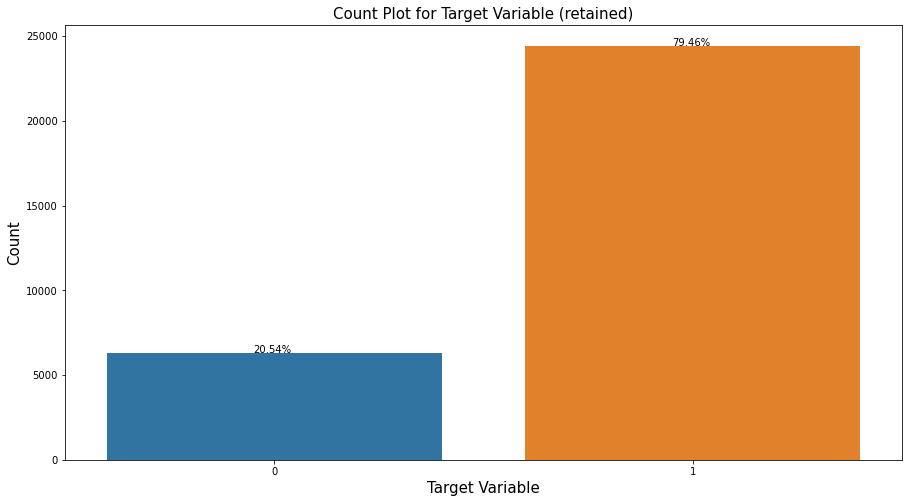

In [20]:
# consider only the target variable
df_target = df['retained'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (retained)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [21]:
# The data is imbalance

## Remove Insignificant Variables

The column `custid` contains the serial number of the customer, which is redundant for further analysis. Thus, we drop the column.

In [22]:
# 'axis = 1' drops the specified column
df = df.drop('custid',axis=1)

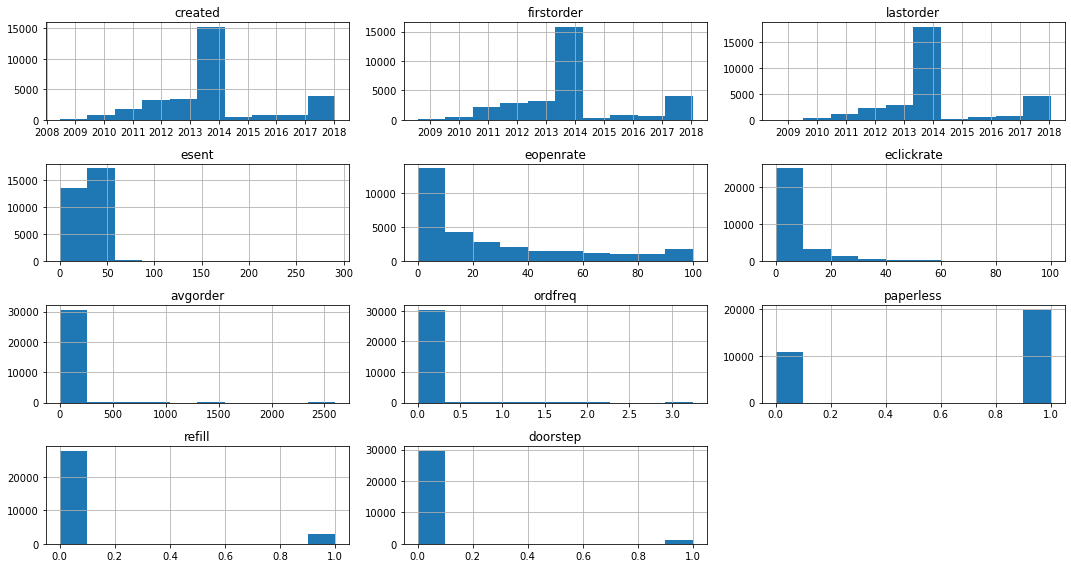

Skewness:


esent         -0.052546
eopenrate      1.165951
eclickrate     3.895510
avgorder      11.703889
ordfreq       10.465979
paperless     -0.625475
refill         2.761946
doorstep       4.767540
dtype: float64

In [23]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df.drop('retained', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df.drop('retained', axis = 1).skew()

**Interpretation:** The above plot indicates that all the variables are not  normally distributed.
                

In [24]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
retained,0,0.0
created,0,0.0
firstorder,0,0.0
lastorder,0,0.0
esent,0,0.0
eopenrate,0,0.0
eclickrate,0,0.0
avgorder,0,0.0
ordfreq,0,0.0
paperless,0,0.0


In [25]:
# null values is been removed earlier 

In [26]:
df.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000
mean,0.794647,28.137314,25.559618,5.676134,61.848928,0.037769,0.649234,0.095034,0.038931
std,0.403966,16.751679,29.558790,10.567226,40.956758,0.103998,0.477218,0.293266,0.193433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.083333,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.960000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,42.000000,40.000000,7.142857,74.260000,0.040917,1.000000,0.000000,0.000000
max,1.000000,291.000000,100.000000,100.000000,2600.140000,3.250000,1.000000,1.000000,1.000000


In [27]:
df.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,0,2012-09-28,2013-08-11,2013-08-11,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,1,2010-12-19,2011-04-01,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,0,2010-10-03,2010-12-01,2011-07-06,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


### Outlier Treatment

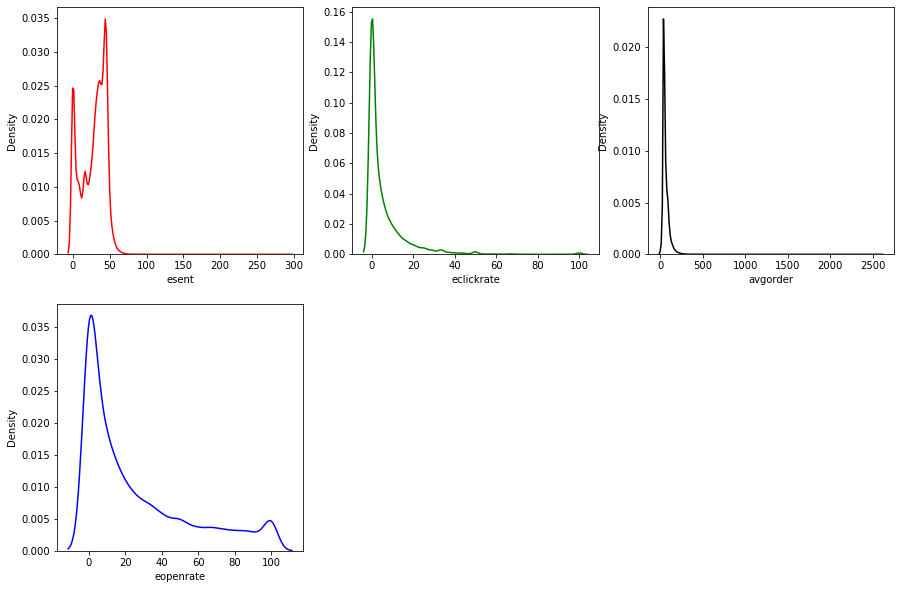

In [28]:
# using kde and subplot to check the normality and outliers 
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(df.esent,color='red');
plt.subplot(2,3,2)
sns.kdeplot(df.eclickrate,color='green')
plt.subplot(2,3,3)
sns.kdeplot(df.avgorder,color='black')
plt.subplot(2,3,4)
sns.kdeplot(df.eopenrate,color='blue')

plt.show()

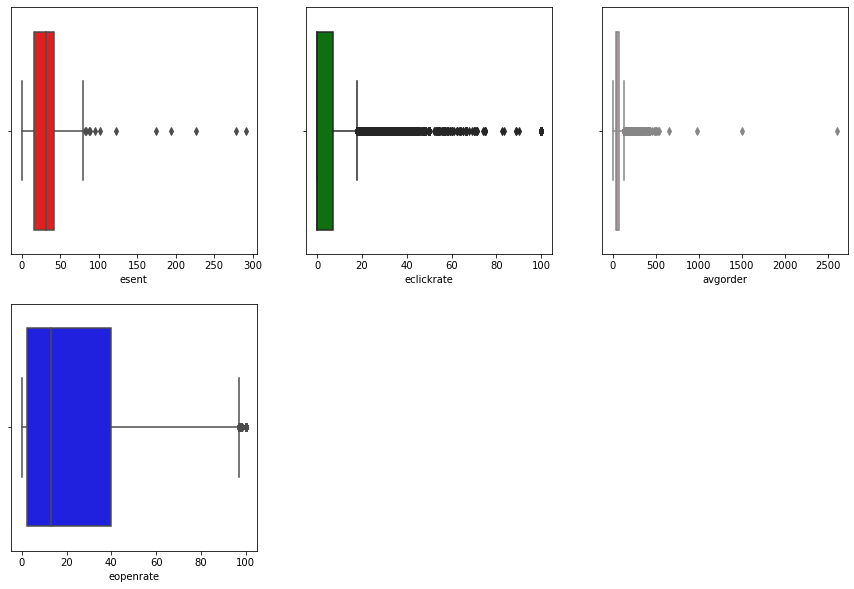

In [29]:
# ploting the boxplot to check whether their are outliers present or not
# using subplot tp plot the boxplot
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x = df.esent,color='red');
plt.subplot(2,3,2)
sns.boxplot(x = df.eclickrate,color='green')
plt.subplot(2,3,3)
sns.boxplot(x = df.avgorder,color='pink')
plt.subplot(2,3,4)
sns.boxplot(df.eopenrate,color='blue')
plt.show()

In [30]:
# creating a function to impute IQR in the particular column
def impute(x):
    for i in x.columns:
        iqr = 1.5*(x[i].quantile(0.75) - x[i].quantile(0.25))
        ul = x[i].quantile(0.75) + iqr
        ll = x[i].quantile(0.25) - iqr
        temp = []
        for j in x[i].index:
            if x[i][j] > ul or x[i][j] < ll :
                temp.append(np.median(x[i]))
            elif x[i][j] < 0:
                temp.append(0)
            else:
                temp.append(x[i][j])
        x[i]= temp
    return x

In [31]:
# imputing the IQR
df[['esent','eclickrate','avgorder','eopenrate']] = impute(df[['esent','eclickrate','avgorder','eopenrate',]])

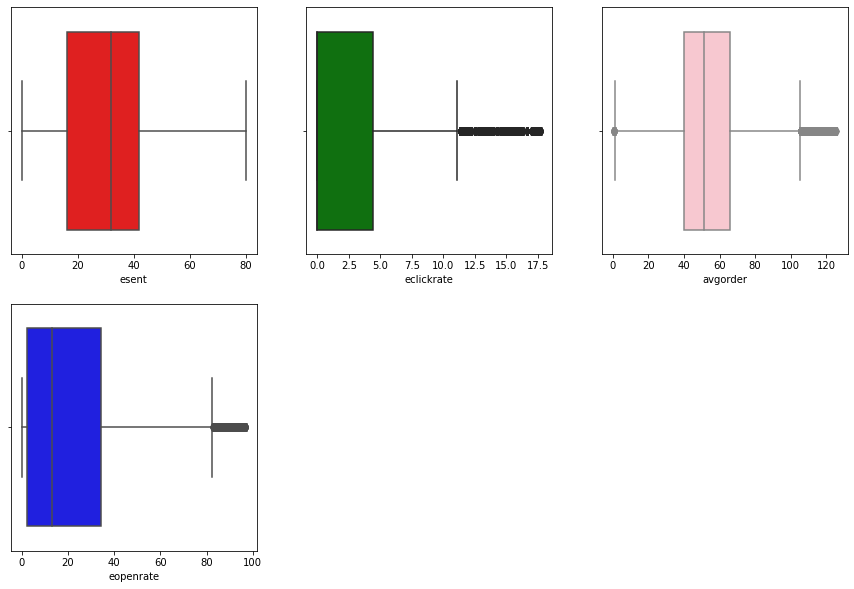

In [32]:
# ploting the boxplot to check whether their are outliers present or not
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x = df.esent,color='red');
plt.subplot(2,3,2)
sns.boxplot(x = df.eclickrate,color='green')
plt.subplot(2,3,3)
sns.boxplot(x = df.avgorder,color='pink')
plt.subplot(2,3,4)
sns.boxplot(df.eopenrate,color='blue')
plt.show()

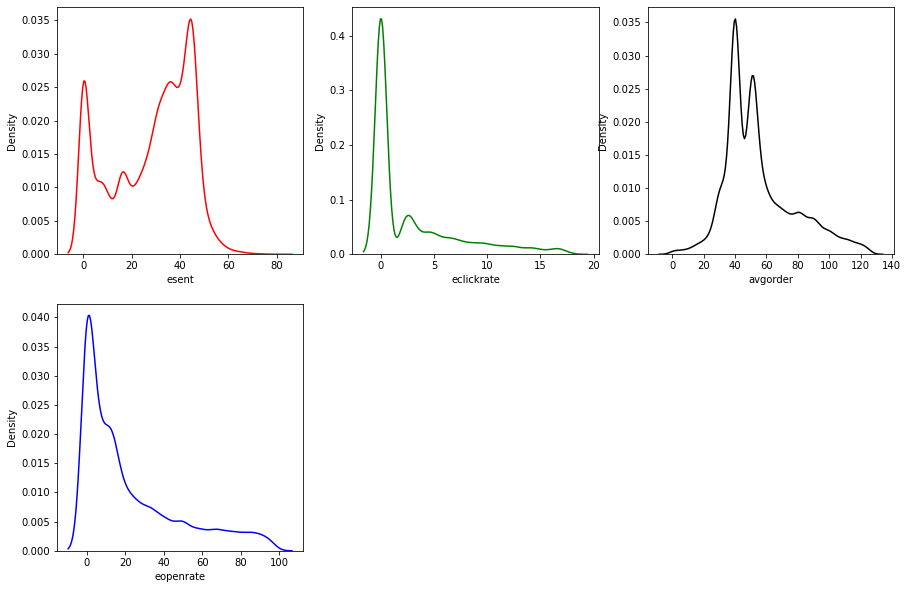

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(df.esent,color='red');
plt.subplot(2,3,2)
sns.kdeplot(df.eclickrate,color='green')
plt.subplot(2,3,3)
sns.kdeplot(df.avgorder,color='black')
#plt.subplot(2,3,4)
#sns.kdeplot(df.ordfreq,color='orange')
plt.subplot(2,3,4)
sns.kdeplot(df.eopenrate,color='blue')
plt.show()

In [34]:
df.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000,30747.000000
mean,0.794647,28.090480,22.229742,2.778352,54.948481,0.037769,0.649234,0.095034,0.038931
std,0.403966,16.505522,25.616478,4.314645,22.565924,0.103998,0.477218,0.293266,0.193433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.083333,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.960000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,42.000000,34.210526,4.444444,66.020000,0.040917,1.000000,0.000000,0.000000
max,1.000000,80.000000,96.875000,17.777778,125.620000,3.250000,1.000000,1.000000,1.000000


In [35]:
# creating the two column to find the difference of when the account created to first order 
# creating the two column to find the difference of when the first orderr to last order 
df['create_first'] = df.firstorder - df.created
df['create_first'] = df['create_first']/np.timedelta64(1,'D')
df['first_last'] = df.lastorder - df.firstorder
df['first_last'] = df['first_last']/np.timedelta64(1,'D')

In [36]:
# droping the firstorder,lastorder,created from the dataframe 
df = df.drop(['firstorder','lastorder','created'],axis=1)

In [37]:
df.head(20)

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,create_first,first_last
0,0,29.0,13.207547,3.448276,14.52,0.000000,0,0,0,Monday,DEL,317.0,0.0
1,1,32.0,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL,103.0,1024.0
2,0,0.0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL,59.0,217.0
3,0,0.0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM,157.0,0.0
4,1,30.0,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM,2.0,791.0
5,1,46.0,80.434783,15.217391,50.96,0.141176,1,1,0,Wednesday,DEL,694.0,1190.0
6,1,60.0,43.333333,6.666667,116.55,0.125000,0,1,0,Friday,BOM,112.0,976.0
7,1,64.0,28.125000,15.625000,68.10,0.040094,1,1,0,Friday,DEL,656.0,848.0
8,1,45.0,0.000000,0.000000,46.60,0.000000,0,0,0,Wednesday,DEL,52.0,0.0
9,1,34.0,94.117647,8.823529,66.07,0.133789,1,0,0,Monday,DEL,53.0,1024.0


## Data visualization (EDA)

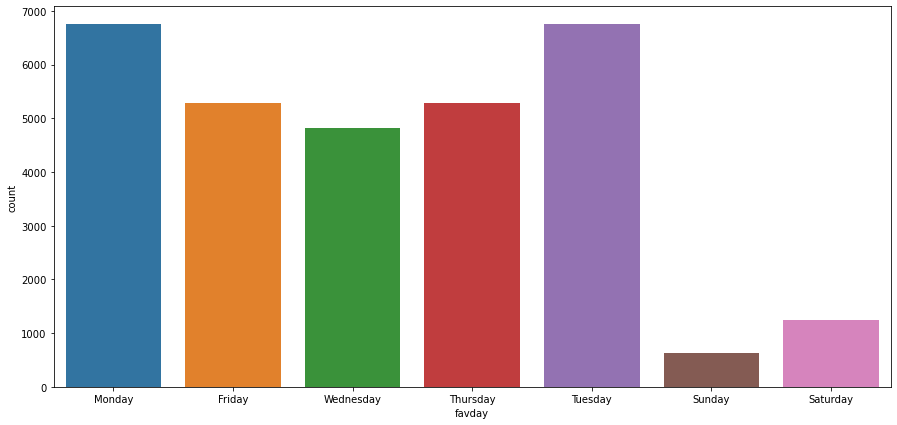

In [38]:
# Using countplot to check the favorite delivery day
plt.figure(figsize=(15,7))
sns.countplot(x = df.favday)
plt.show()

In [39]:
#The number of orders delivered are highest on Monday and Tuesday since the number
# of orders placed are maximum on Saturday and Sunday.


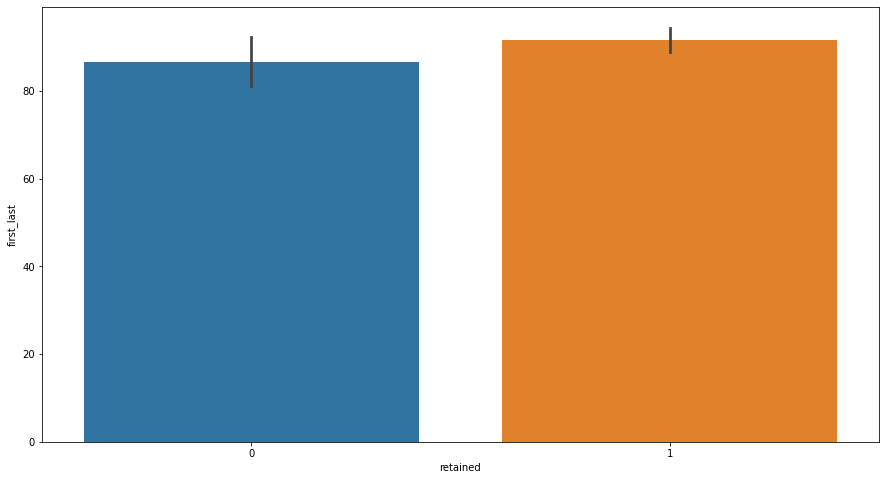

In [40]:
sns.barplot(x=df['retained'],y=df['first_last']);

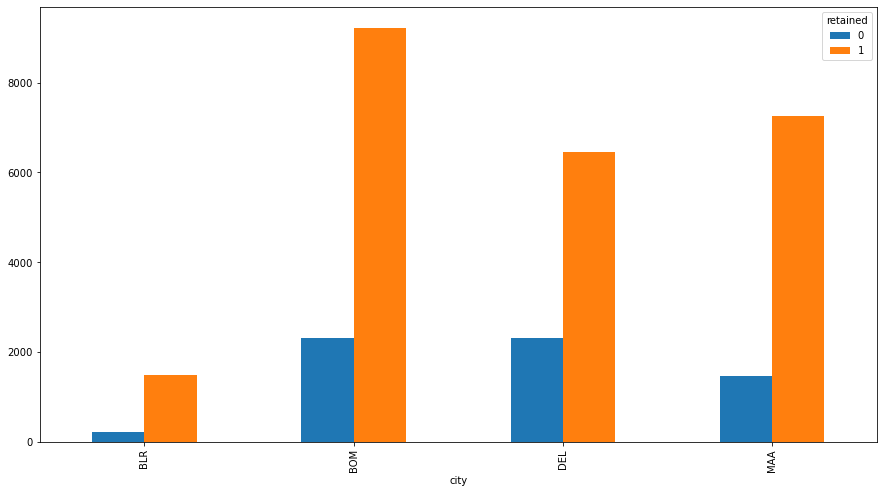

In [41]:
pd.crosstab(index=df.city,columns=df.retained).plot(kind='bar',figsize=(15,8))
plt.show()

In [42]:
# The retention rate is maximum in Bombay because of high population and rainy climatic conditions. 
# Bangalore has the least retention rate because people in Bangalore prefer coffee over tea.


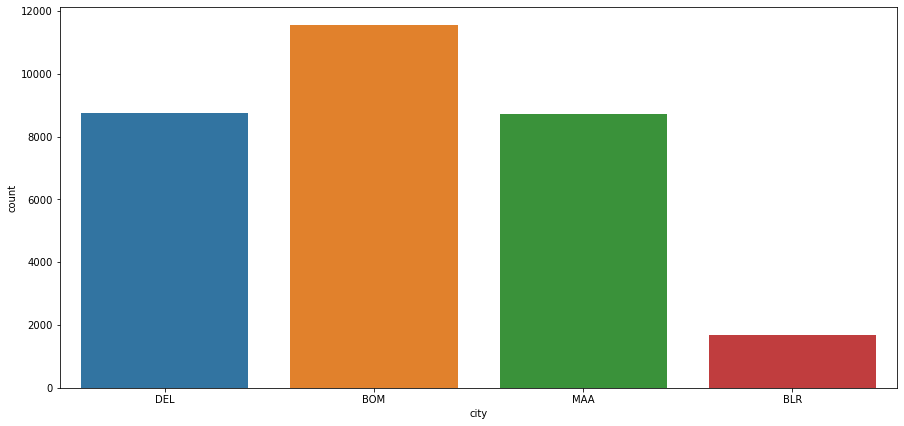

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(x = df.city)
plt.show()

In [44]:
# most of the orders are placed from the bombay city
# bangalore has the least order 

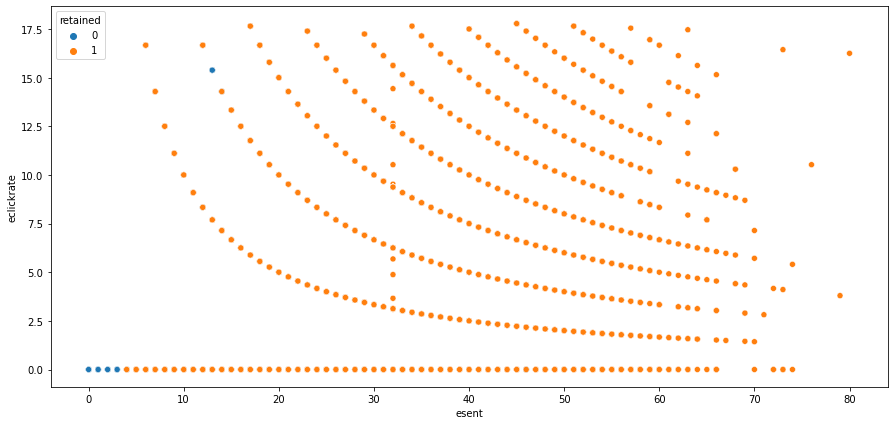

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.esent, y = df.eclickrate, hue= df.retained)
plt.show()

In [46]:
# The greater the emails sent(esent) the eclickrate goes down.

<AxesSubplot:xlabel='esent', ylabel='retained'>

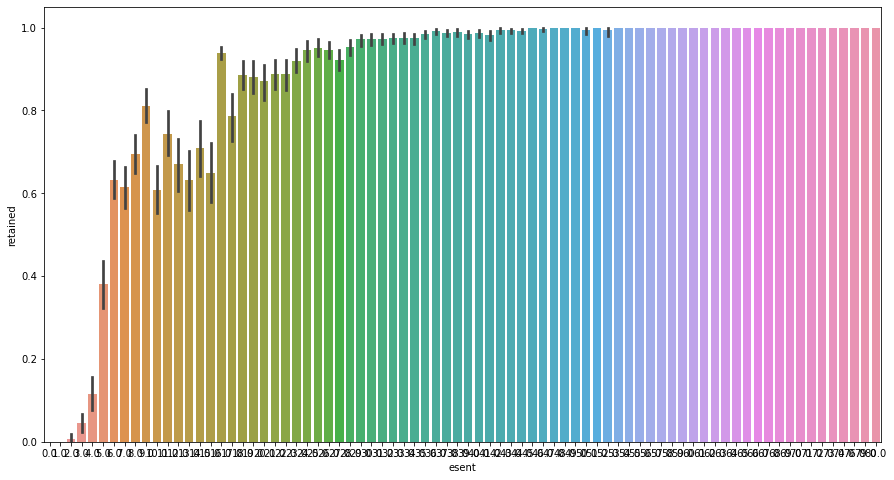

In [47]:
sns.barplot(x=df.esent,y=df.retained)

In [48]:
# As esent increases customers are likely to be retained


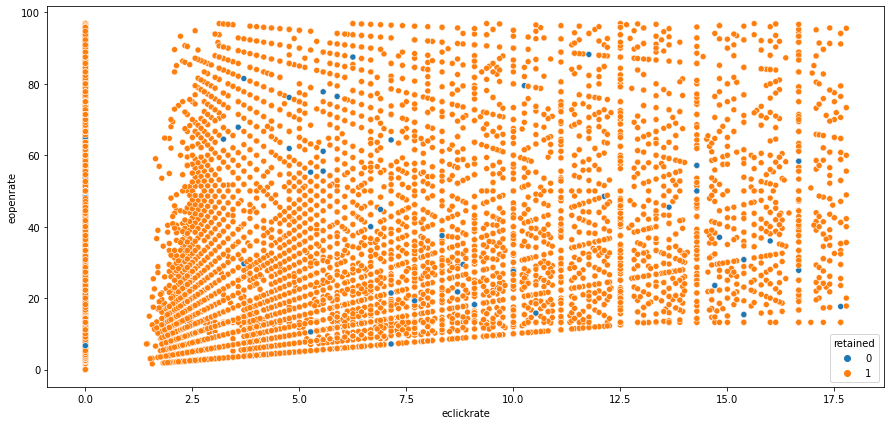

In [49]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.eclickrate, y = df.eopenrate, hue= df.retained)
plt.show()

In [50]:
# As esent increases customers are likely to be retained


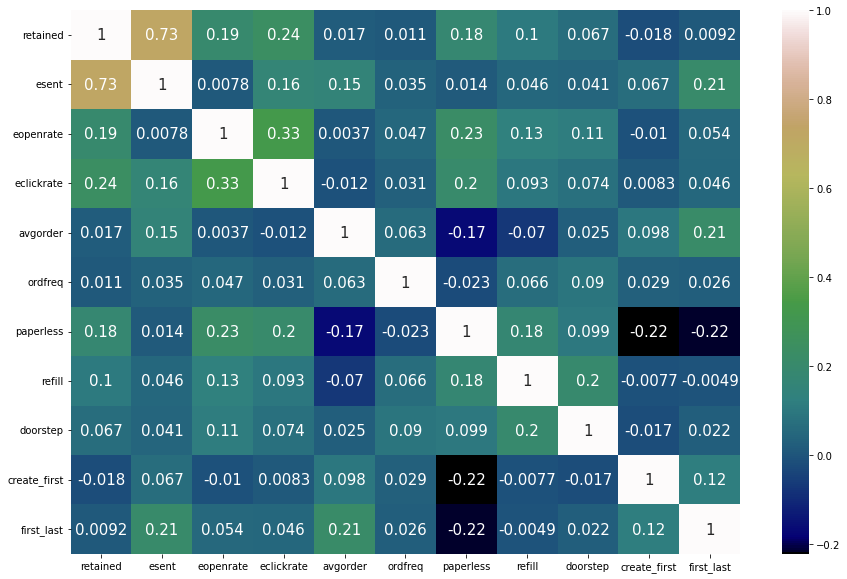

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':15}, cmap = 'gist_earth');

In [52]:
# esent is highly  + correlated with retained
# Paperless and avgorder are - ve correlation 

In [53]:
df.shape

(30747, 13)

In [54]:
X = df.drop('retained',axis=1)
Y = df.retained
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=12)

In [55]:
xtrain.head()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,create_first,first_last
17332,35.0,2.857143,0.000000,37.94,0.214286,1,0,0,Thursday,DEL,0.0,14.0
29084,35.0,2.857143,0.000000,36.80,0.151515,1,0,0,Monday,MAA,0.0,33.0
2034,43.0,27.906977,0.000000,63.92,0.109164,1,0,0,Monday,DEL,443.0,742.0
19441,33.0,9.090909,3.030303,40.25,0.000000,1,0,0,Thursday,DEL,0.0,0.0
6591,0.0,0.000000,0.000000,75.81,0.016129,0,0,0,Monday,BOM,0.0,124.0


In [56]:
xtrain.shape

(21522, 12)

In [57]:
xtest.shape

(9225, 12)

In [58]:
xtest.head()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,create_first,first_last
30213,63.0,68.253968,0.0,96.71,0.233333,1,0,1,Saturday,MAA,83.0,30.0
13118,4.0,25.000000,0.0,50.96,0.000000,1,0,0,Friday,DEL,1.0,0.0
11120,20.0,30.000000,15.0,50.59,0.222222,0,0,0,Tuesday,BOM,1014.0,9.0
7695,40.0,40.000000,15.0,98.16,0.125000,1,0,0,Tuesday,DEL,1427.0,16.0
9813,18.0,0.000000,0.0,120.45,0.058824,1,0,0,Tuesday,DEL,0.0,102.0


### Transformation 

In [59]:
import scipy.stats as s

In [60]:
# Using boxcox to

In [61]:
xtrain['avgorder'] = s.boxcox(xtrain.avgorder+1)[0]
xtrain['esent'] = s.boxcox(xtrain.esent+1)[0]
xtrain['eopenrate'] = s.boxcox(xtrain.eopenrate+1)[0]
xtrain['eclickrate'] = s.boxcox(xtrain.eclickrate+1)[0]
xtrain['create_first'] = s.boxcox(abs(xtrain.create_first)+1)[0]
xtrain['first_last'] = s.boxcox(xtrain.first_last+5)[0]

In [62]:
xtrain.head()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,create_first,first_last
17332,23.385315,1.493100,0.000000,8.812655,0.214286,1,0,0,Thursday,DEL,0.000000,1.390604
29084,23.385315,1.493100,0.000000,8.672427,0.151515,1,0,0,Monday,MAA,0.000000,1.489425
2034,27.936726,4.351149,0.000000,11.524373,0.109164,1,0,0,Monday,DEL,2.794496,1.650334
19441,22.224295,2.752666,0.873786,9.089739,0.000000,1,0,0,Thursday,DEL,0.000000,1.036295
6591,0.000000,0.000000,0.000000,12.553521,0.016129,0,0,0,Monday,BOM,0.000000,1.589549


In [63]:
xtest['avgorder'] = s.boxcox(xtest.avgorder+1)[0]
xtest['esent'] = s.boxcox(xtest.esent+1)[0]
xtest['eopenrate'] = s.boxcox(xtest.eopenrate+1)[0]
xtest['eclickrate'] = s.boxcox(xtest.eclickrate+1)[0]
xtest['create_first'] = s.boxcox(abs(xtest.create_first)+1)[0]
xtest['first_last'] = s.boxcox(xtest.first_last+5)[0]

In [64]:
xtest.head()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,create_first,first_last
30213,40.120198,5.789098,0.000000,14.111987,0.233333,1,0,1,Saturday,MAA,2.476752,1.463088
13118,3.470332,4.130372,0.000000,10.240801,0.000000,1,0,0,Friday,DEL,0.627079,1.029650
11120,14.709258,4.411637,1.193006,10.202661,0.222222,0,0,0,Tuesday,BOM,2.956834,1.319954
7695,27.013450,4.873249,1.193006,14.215244,0.125000,1,0,0,Tuesday,DEL,2.999263,1.393097
9813,13.403383,0.000000,0.000000,15.704155,0.058824,1,0,0,Tuesday,DEL,0.000000,1.558169


In [65]:
xtest.describe()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,create_first,first_last
count,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000,9225.000000
mean,19.295005,2.888699,0.410671,10.382463,0.037144,0.652033,0.093008,0.037398,1.042516,1.216164
std,10.731860,2.084649,0.502041,2.186513,0.106525,0.476351,0.290460,0.189746,1.052573,0.246853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.029650
25%,12.077757,1.128921,0.000000,9.038430,0.000000,0.000000,0.000000,0.000000,0.000000,1.029650
50%,22.226624,3.175222,0.000000,10.236686,0.000000,1.000000,0.000000,0.000000,0.627079,1.029650
75%,28.188407,4.578164,0.974692,11.661418,0.039062,1.000000,0.000000,0.000000,2.096179,1.498709
max,48.828580,6.431394,1.213178,16.018454,2.142857,1.000000,1.000000,1.000000,3.037104,1.639704


In [66]:
xtrain.describe()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,create_first,first_last
count,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000
mean,18.705701,2.944819,0.408253,10.422846,0.038038,0.648035,0.095902,0.039587,1.025041,1.229502
std,10.437589,2.114319,0.500795,2.210037,0.102898,0.477594,0.294463,0.194992,1.040803,0.253888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.036295
25%,11.179582,1.224508,0.000000,9.062557,0.000000,0.000000,0.000000,0.000000,0.000000,1.036295
50%,21.639892,3.245455,0.000000,10.270222,0.000000,1.000000,0.000000,0.000000,0.625706,1.036295
75%,27.375217,4.682847,0.971140,11.718040,0.041667,1.000000,0.000000,0.000000,2.077454,1.520531
max,47.644262,6.540736,1.206786,16.085289,3.250000,1.000000,1.000000,1.000000,2.983873,1.664922


### Scaling 

In [67]:
SS = StandardScaler()

In [68]:
a = SS.fit_transform(xtrain[['eclickrate','eopenrate','eclickrate','avgorder','esent','create_first','first_last']])

In [69]:
xtrain['eclickrate'] = a[:,0]
xtrain['eopenrate'] = a[:,1]
xtrain['eclickrate'] = a[:,2]
xtrain['avgorder'] = a[:,3]
xtrain['esent'] = a[:,4]
xtrain['create_first'] = a[:,5]
xtrain['first_last'] = a[:,6]

In [70]:
xtrain.head()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,create_first,first_last
17332,0.448353,-0.686629,-0.815228,-0.728598,0.214286,1,0,0,Thursday,DEL,-0.984879,0.634553
29084,0.448353,-0.686629,-0.815228,-0.792050,0.151515,1,0,0,Monday,MAA,-0.984879,1.023795
2034,0.884423,0.665161,-0.815228,0.498432,0.109164,1,0,0,Monday,DEL,1.700125,1.657588
19441,0.337116,-0.090884,0.929610,-0.603220,0.000000,1,0,0,Thursday,DEL,-0.984879,-0.761014
6591,-1.792189,-1.392830,-0.815228,0.964113,0.016129,0,0,0,Monday,BOM,-0.984879,1.418168


In [71]:
b = SS.transform(xtest[['eclickrate','eopenrate','eclickrate','avgorder','esent','create_first','first_last']])
b

array([[-0.81522789,  1.34527696, -0.81522789, ...,  2.05171856,
         1.39483085,  0.92005849],
       [-0.81522789,  0.56073858, -0.81522789, ..., -1.45969752,
        -0.38237012, -0.78718578],
       [ 1.56705082,  0.69377003,  1.56705082, ..., -0.38289833,
         1.8561032 ,  0.35627678],
       ...,
       [-0.81522789, -0.49876326, -0.81522789, ...,  1.13148961,
         0.80907939,  0.79061416],
       [-0.81522789, -1.3928303 , -0.81522789, ...,  0.45334903,
        -0.98487948, -0.78718578],
       [ 1.25678324,  0.05494615,  1.25678324, ..., -0.57126678,
        -0.98487948, -0.78718578]])

In [72]:
xtest['eclickrate'] = b[:,0]
xtest['eopenrate'] = b[:,1]
xtest['eclickrate'] = b[:,2]
xtest['avgorder'] = b[:,3]
xtest['esent'] = b[:,4]
xtest['create_first'] = b[:,5]
xtest['first_last'] = b[:,6]

In [73]:
xtest.head()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,create_first,first_last
30213,2.051719,1.345277,-0.815228,1.669305,0.233333,1,0,1,Saturday,MAA,1.394831,0.920058
13118,-1.459698,0.560739,-0.815228,-0.082374,0.000000,1,0,0,Friday,DEL,-0.382370,-0.787186
11120,-0.382898,0.693770,1.567051,-0.099632,0.222222,0,0,0,Tuesday,BOM,1.856103,0.356277
7695,0.795964,0.912102,1.567051,1.716029,0.125000,1,0,0,Tuesday,DEL,1.896870,0.644375
9813,-0.508014,-1.392830,-0.815228,2.389748,0.058824,1,0,0,Tuesday,DEL,-0.984879,1.294566


### Encoding the categorical columns

In [74]:
# Using dummy emcoding to encode the categorical columns

In [75]:
xtrain = pd.concat((xtrain.drop(columns=['city','favday'],axis=1),pd.get_dummies(xtrain[['favday','city']],drop_first=True)),
                   axis=1)

In [76]:
xtrain.head()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,create_first,first_last,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
17332,0.448353,-0.686629,-0.815228,-0.728598,0.214286,1,0,0,-0.984879,0.634553,0,0,0,1,0,0,0,1,0
29084,0.448353,-0.686629,-0.815228,-0.792050,0.151515,1,0,0,-0.984879,1.023795,1,0,0,0,0,0,0,0,1
2034,0.884423,0.665161,-0.815228,0.498432,0.109164,1,0,0,1.700125,1.657588,1,0,0,0,0,0,0,1,0
19441,0.337116,-0.090884,0.929610,-0.603220,0.000000,1,0,0,-0.984879,-0.761014,0,0,0,1,0,0,0,1,0
6591,-1.792189,-1.392830,-0.815228,0.964113,0.016129,0,0,0,-0.984879,1.418168,1,0,0,0,0,0,1,0,0


In [77]:
xtest = pd.concat((xtest.drop(columns=['city','favday'],axis=1),pd.get_dummies(xtest[['favday','city']],drop_first=True))
                  ,axis=1)

In [78]:
xtest.head()

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,create_first,first_last,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
30213,2.051719,1.345277,-0.815228,1.669305,0.233333,1,0,1,1.394831,0.920058,0,1,0,0,0,0,0,0,1
13118,-1.459698,0.560739,-0.815228,-0.082374,0.000000,1,0,0,-0.382370,-0.787186,0,0,0,0,0,0,0,1,0
11120,-0.382898,0.693770,1.567051,-0.099632,0.222222,0,0,0,1.856103,0.356277,0,0,0,0,1,0,1,0,0
7695,0.795964,0.912102,1.567051,1.716029,0.125000,1,0,0,1.896870,0.644375,0,0,0,0,1,0,0,1,0
9813,-0.508014,-1.392830,-0.815228,2.389748,0.058824,1,0,0,-0.984879,1.294566,0,0,0,0,1,0,0,1,0


In [79]:
xtrain.to_csv('train.csv')

In [80]:
xtest.to_csv('test.csv')

### Balancing the data

In [81]:
xtrain.shape

(21522, 19)

In [82]:
ytrain.shape

(21522,)

In [83]:
from imblearn.combine import SMOTEENN

In [84]:
xtrain_bal,ytrain_bal = SMOTEENN().fit_resample(xtrain,ytrain)

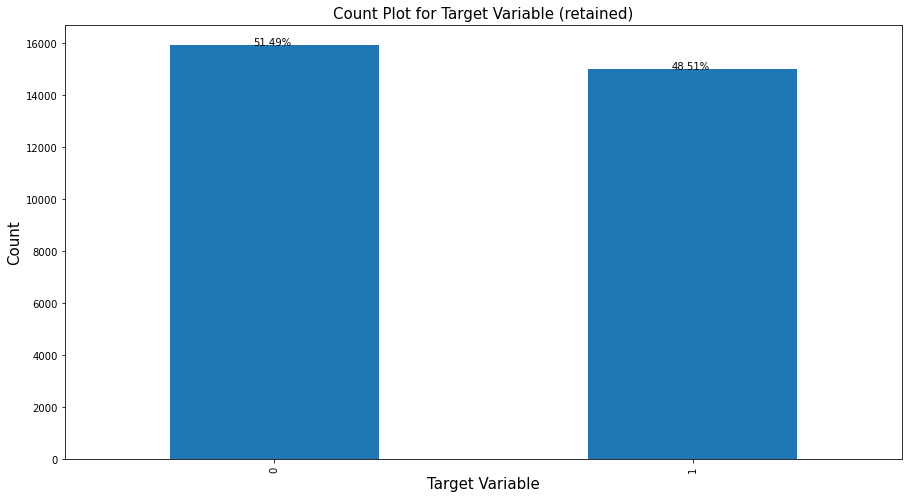

In [85]:
ytrain_bal.value_counts().plot(kind='bar')
plt.text(x = -0.05, y = ytrain_bal.value_counts()[0] + 1, s = str(round((ytrain_bal.value_counts()[0])*100/len(ytrain_bal),2)) + '%')
plt.text(x = 0.95, y = ytrain_bal.value_counts()[1] +1, s = str(round((ytrain_bal.value_counts()[1])*100/len(ytrain_bal),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (retained)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [86]:
# The data is balanced 

In [87]:
import  scipy.stats as stats

## Base model

In [88]:
print(xtrain_bal.shape)
print(ytrain_bal.shape)

(30902, 19)
(30902,)


In [89]:
# Logestic regression 
log_reg = sm.Logit(ytrain_bal,xtrain_bal).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.126222
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               retained   No. Observations:                30902
Model:                          Logit   Df Residuals:                    30883
Method:                           MLE   Df Model:                           18
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:                  0.8178
Time:                        17:30:48   Log-Likelihood:                -3900.5
converged:                       True   LL-Null:                       -21406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
esent                4.2228      0.059     71.605      0.000       4.107       4.338
eopenrate  

In [90]:
odds = pd.DataFrame((np.exp(log_reg.params)),index = xtrain.columns,columns=['ODDS'])
odds

,ODDS
esent,68.225085
eopenrate,0.837410
eclickrate,1.152812
avgorder,0.869920
ordfreq,2.861743
paperless,1.192181
refill,6.805624
doorstep,6.206105
create_first,0.556709
first_last,0.619381


In [91]:
ypred = log_reg.predict(xtest) # predecting the value
ypred = [1 if i > 0.5 else 0 for i in ypred]

In [92]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79      1865
           1       0.97      0.90      0.94      7360

    accuracy                           0.90      9225
   macro avg       0.84      0.90      0.86      9225
weighted avg       0.92      0.90      0.91      9225



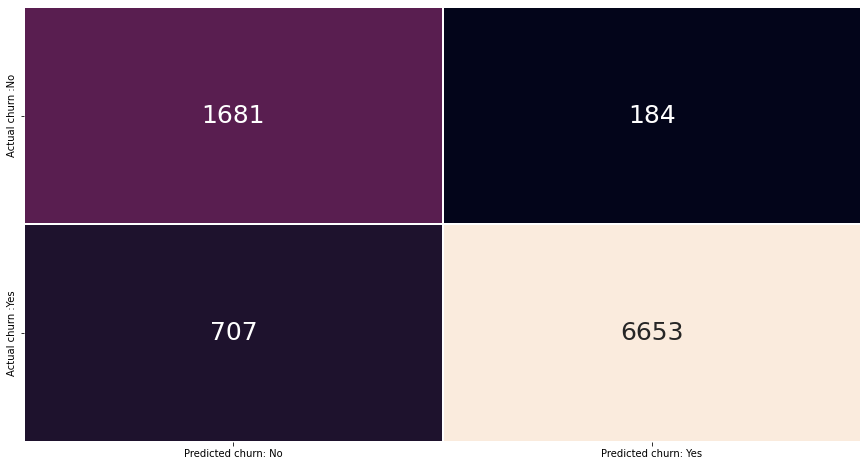

In [93]:
cm = confusion_matrix(ytest,ypred)
# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted churn: No','Predicted churn: Yes'], 
                           index = ['Actual churn :No','Actual churn :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

In [94]:
cp =classification_report(ytest,ypred).split()
cp[5],cp[6],cp[7]

('0.70', '0.90', '0.79')

In [95]:
cp


['precision',
 'recall',
 'f1-score',
 'support',
 '0',
 '0.70',
 '0.90',
 '0.79',
 '1865',
 '1',
 '0.97',
 '0.90',
 '0.94',
 '7360',
 'accuracy',
 '0.90',
 '9225',
 'macro',
 'avg',
 '0.84',
 '0.90',
 '0.86',
 '9225',
 'weighted',
 'avg',
 '0.92',
 '0.90',
 '0.91',
 '9225']

In [96]:
metrics_df = pd.DataFrame([cp[5],cp[6],cp[7],round(accuracy_score(ytest,ypred),3),round(roc_auc_score(ytest,ypred),3)],
                          index=['Churn_precision','Churn_recall','Churn_f1score','Accuracy','Roc_Auc_Score'],
                         columns=['Base_model']).T
metrics_df

,Churn_precision,Churn_recall,Churn_f1score,Accuracy,Roc_Auc_Score
Base_model,0.70,0.90,0.79,0.903,0.903


In [97]:
## To find the multicollineartity present in the datasets we will use vif 

## VIF 

In [98]:
vif = [variance_inflation_factor(xtrain_bal.values,i) for i in range(xtrain_bal.shape[1])]

In [99]:
vif_df = pd.DataFrame({'Features':xtrain_bal.columns,'VIF':vif})
vif_df.sort_values('VIF',ascending=False)

,Features,VIF
5,paperless,2.737418
16,city_BOM,2.683925
17,city_DEL,2.553279
18,city_MAA,2.506340
10,favday_Monday,1.908954
14,favday_Tuesday,1.833700
0,esent,1.789026
1,eopenrate,1.720130
15,favday_Wednesday,1.666940
2,eclickrate,1.666431


In [100]:
# As the value of every feature is less than the 5 we can say that the presence of multicollinearty is not present 

## Feature Selection

In [101]:
LR = LogisticRegression()

In [102]:
## RFE SElection
rfe = RFE(estimator=LR).fit(xtrain_bal,ytrain_bal)

feature_ranking = pd.DataFrame([xtrain_bal.columns,rfe.ranking_],index=['Feature','Ranking']).T
rfe_feat=feature_ranking[feature_ranking.Ranking==1]
rfe_feat.Feature

0                esent
6               refill
7             doorstep
8         create_first
10       favday_Monday
11     favday_Saturday
12       favday_Sunday
13     favday_Thursday
15    favday_Wednesday
Name: Feature, dtype: object

In [103]:
feature_ranking.sort_values('Ranking').reset_index()

,index,Feature,Ranking
0,0,esent,1
1,15,favday_Wednesday,1
2,13,favday_Thursday,1
3,12,favday_Sunday,1
4,6,refill,1
5,7,doorstep,1
6,8,create_first,1
7,11,favday_Saturday,1
8,10,favday_Monday,1
9,14,favday_Tuesday,2


In [104]:
x = xtrain_bal[rfe_feat.Feature]
y= ytrain_bal

rfe_reg = sm.Logit(y,x).fit()
print(rfe_reg.summary())

Optimization terminated successfully.
         Current function value: 0.159729
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               retained   No. Observations:                30902
Model:                          Logit   Df Residuals:                    30893
Method:                           MLE   Df Model:                            8
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:                  0.7694
Time:                        17:30:52   Log-Likelihood:                -4936.0
converged:                       True   LL-Null:                       -21406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
esent                3.6820      0.045     81.240      0.000       3.593       3.771
refill     

Confusion Matrix: [[1703  162]
 [ 948 6412]]


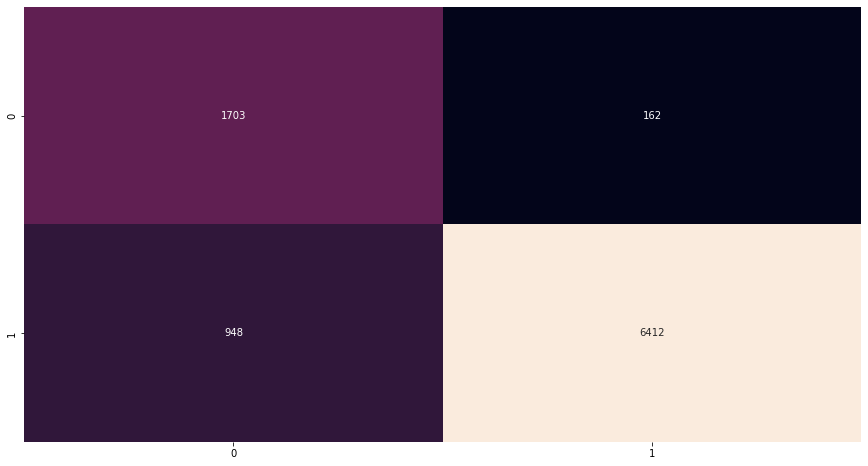

In [105]:
rfe_ypred_test = rfe_reg.predict(xtest[rfe_feat.Feature])
rfe_ypred_test = [1 if i > 0.5 else 0 for i in rfe_ypred_test]
cm_1 = confusion_matrix(ytest,rfe_ypred_test)
print('Confusion Matrix:',cm_1)
sns.heatmap(cm_1,annot=True,cbar=False,fmt='d');

In [106]:
print('RFE Feature selected Logistic Regression:')
print(classification_report(ytest,rfe_ypred_test))
print('Cohen Kappa Score:',round(cohen_kappa_score(ytest,rfe_ypred_test),2))
print('ROC AUC Score:',round(roc_auc_score(ytest,rfe_ypred_test),3))

RFE Feature selected Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.91      0.75      1865
           1       0.98      0.87      0.92      7360

    accuracy                           0.88      9225
   macro avg       0.81      0.89      0.84      9225
weighted avg       0.91      0.88      0.89      9225

Cohen Kappa Score: 0.68
ROC AUC Score: 0.892


In [107]:
# The model using rfe features selection gave best result than forward and backward selection techniques

ROC AUC Score: 0.892


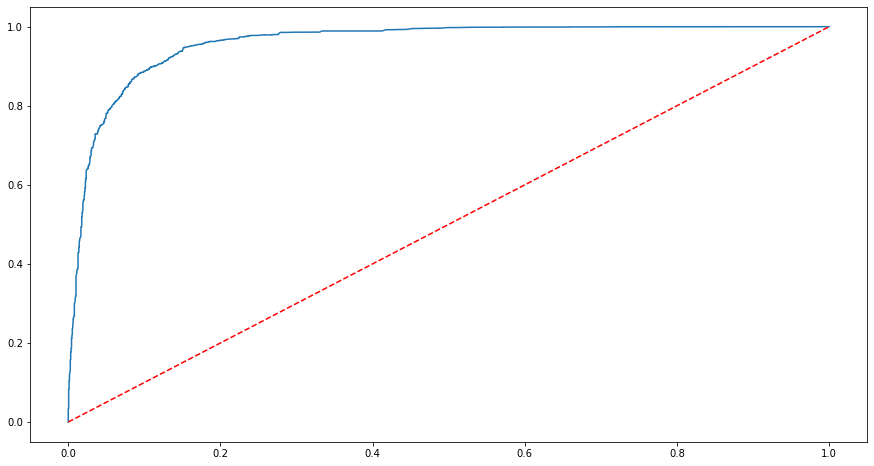

In [108]:
fpr,tpr,th = roc_curve(ytest,rfe_reg.predict(xtest[rfe_feat.Feature]))
print('ROC AUC Score:',round(roc_auc_score(ytest,rfe_ypred_test),3))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.show()

In [109]:
log_rfe = LogisticRegression().fit(xtrain_bal[rfe_feat.Feature],ytrain_bal)

In [110]:
cp = classification_report(ytest,rfe_ypred_test).split()
metrics_df1 = pd.DataFrame([cp[5],cp[6],cp[7],round(accuracy_score(ytest,rfe_ypred_test),3),round(roc_auc_score(ytest,rfe_ypred_test),3)],
                          index=['Churn_precision','Churn_recall','Churn_f1score','Accuracy','Roc_Auc_Score'],
                         columns=['Rfe_Features_model']).T

metrics_df2 = pd.concat([metrics_df,metrics_df1],axis=0)
metrics_df2

,Churn_precision,Churn_recall,Churn_f1score,Accuracy,Roc_Auc_Score
Base_model,0.70,0.90,0.79,0.903,0.903
Rfe_Features_model,0.64,0.91,0.75,0.88,0.892


## Decision Tree

In [111]:
dt = DecisionTreeClassifier()

#### Hyperparamter Tuning

In [112]:
params = {'max_depth':[3,4,5],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3],
    'max_leaf_nodes':[13,14,15]}

dt_grid = GridSearchCV(dt,param_grid=params,scoring='accuracy',n_jobs=-1)
dt_grid.fit(xtrain_bal,ytrain_bal)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_leaf_nodes': [13, 14, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [113]:
dt_grid.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [114]:
tuned_mod = DecisionTreeClassifier(criterion= 'gini', max_depth =  4, max_leaf_nodes =  14, 
                                   min_samples_leaf =  1, min_samples_split =  2)

In [115]:
tuned_mod.fit(xtrain_bal,ytrain_bal)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=14)

In [116]:
ypred_tuned = tuned_mod.predict(xtest)

In [117]:
feat_imp = pd.DataFrame({'Features':xtest.columns,'Importance':tuned_mod.feature_importances_}).sort_values('Importance',ascending=False)
feat_imp[feat_imp.Importance!=0]

,Features,Importance
0,esent,0.965729
8,create_first,0.011567
5,paperless,0.010734
1,eopenrate,0.005967
3,avgorder,0.005075
6,refill,0.000927


Confusion Matrix: [[1687  178]
 [ 508 6852]]


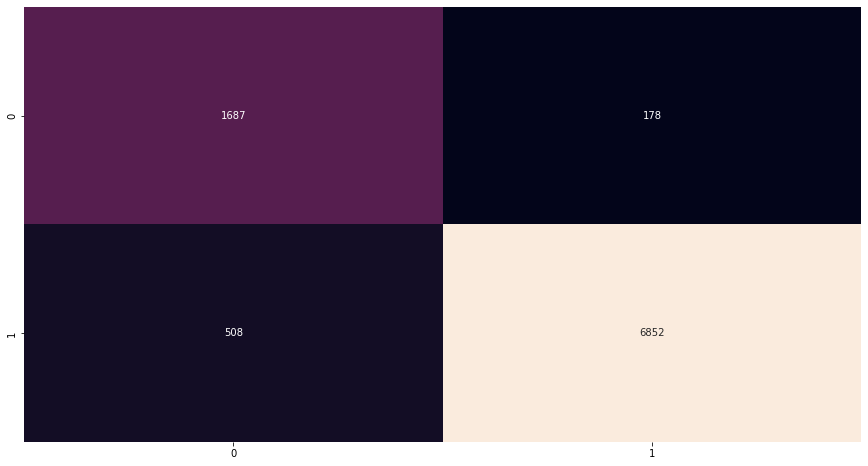

In [118]:

cm_2 = confusion_matrix(ytest,ypred_tuned)
print('Confusion Matrix:',cm_2)
sns.heatmap(cm_2,annot=True,cbar=False,fmt='d');

In [119]:
print('Decision Tree:')
print(classification_report(ytest,ypred_tuned))
print('Cohen Kappa Score:',round(cohen_kappa_score(ytest,ypred_tuned),3))
print('ROC AUC Score:',round(roc_auc_score(ytest,tuned_mod.predict_proba(xtest)[:,1]),2))

Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1865
           1       0.97      0.93      0.95      7360

    accuracy                           0.93      9225
   macro avg       0.87      0.92      0.89      9225
weighted avg       0.93      0.93      0.93      9225

Cohen Kappa Score: 0.784
ROC AUC Score: 0.97


In [120]:
from sklearn import tree

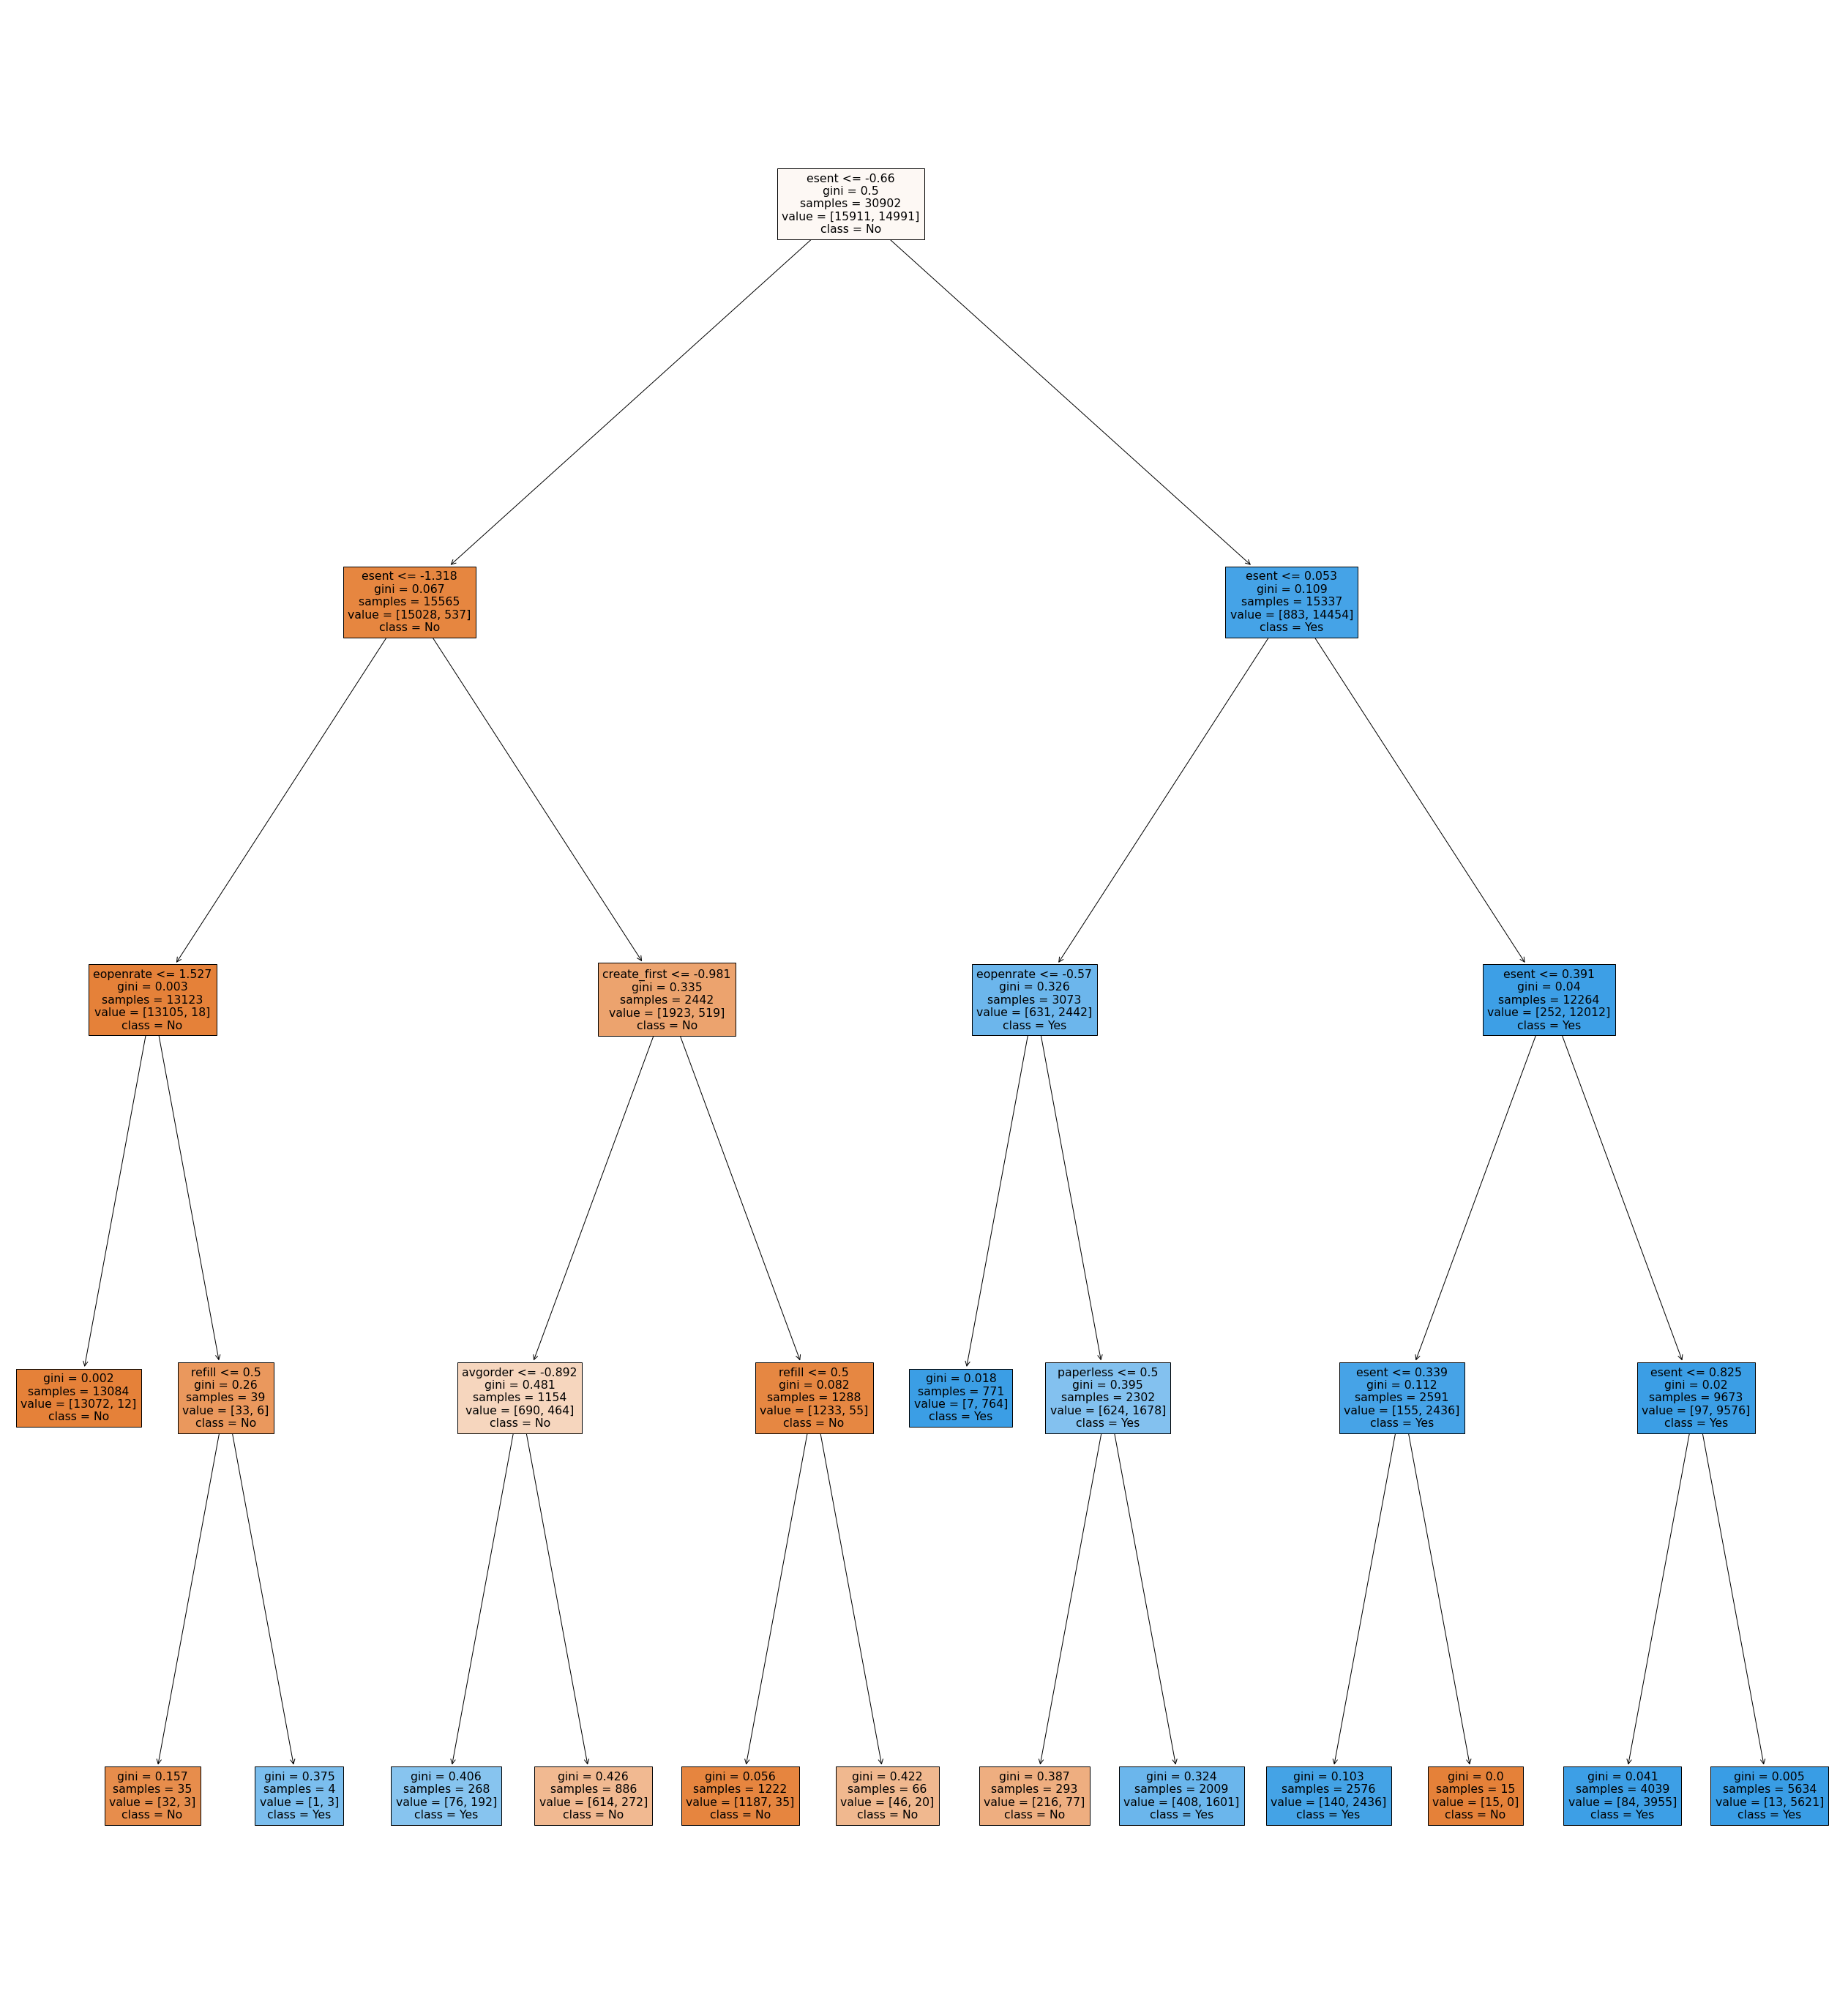

In [121]:
#Plot the decision tree
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(tuned_mod,
                   feature_names=xtrain_bal.columns,  
                   class_names=['No','Yes'],
                   filled=True)


In [122]:
print('Cohen Kappa Score:',round(cohen_kappa_score(ytest,ypred_tuned),2))

Cohen Kappa Score: 0.78


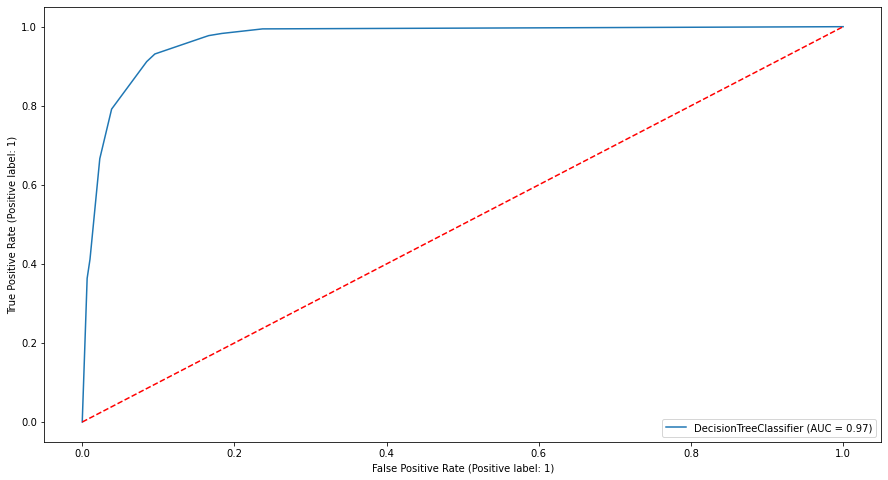

In [123]:
plot_roc_curve(estimator=tuned_mod,X= xtest,y= ytest)
plt.plot([0,1],[0,1],'r--')
plt.show()

In [124]:
cp = classification_report(ytest,ypred_tuned).split()
metrics_df3 = pd.DataFrame([cp[5],cp[6],cp[7],round(accuracy_score(ytest,ypred_tuned),3),round(roc_auc_score(ytest,ypred_tuned),3)],
                          index=['Churn_precision','Churn_recall','Churn_f1score','Accuracy','Roc_Auc_Score'],
                         columns=['Decision_Tree']).T

metrics_df2 = pd.concat([metrics_df2,metrics_df3],axis=0)
metrics_df2

,Churn_precision,Churn_recall,Churn_f1score,Accuracy,Roc_Auc_Score
Base_model,0.70,0.90,0.79,0.903,0.903
Rfe_Features_model,0.64,0.91,0.75,0.88,0.892
Decision_Tree,0.77,0.90,0.83,0.926,0.918


### Random Forest

In [125]:
rf = RandomForestClassifier(n_estimators=250)

In [126]:
params = {'max_depth':np.arange(30,50,5)}

In [127]:
rf_grid = GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1)
rf_grid.fit(xtrain_bal,ytrain_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=250),
             n_jobs=-1, param_grid={'max_depth': array([30, 35, 40, 45])})

In [128]:
rf_grid.best_params_

{'max_depth': 30}

In [129]:
rf_tuned = RandomForestClassifier(n_estimators=250,max_depth=30).fit(xtrain_bal,ytrain_bal)

In [130]:
print('Random Forest:')
rf_ypred = rf_tuned.predict(xtest)
print(classification_report(ytest,rf_ypred))
print("Cohen Kappa Score:",round(cohen_kappa_score(rf_ypred,ytest),3))

Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1865
           1       0.97      0.95      0.96      7360

    accuracy                           0.94      9225
   macro avg       0.90      0.93      0.91      9225
weighted avg       0.95      0.94      0.94      9225

Cohen Kappa Score: 0.828


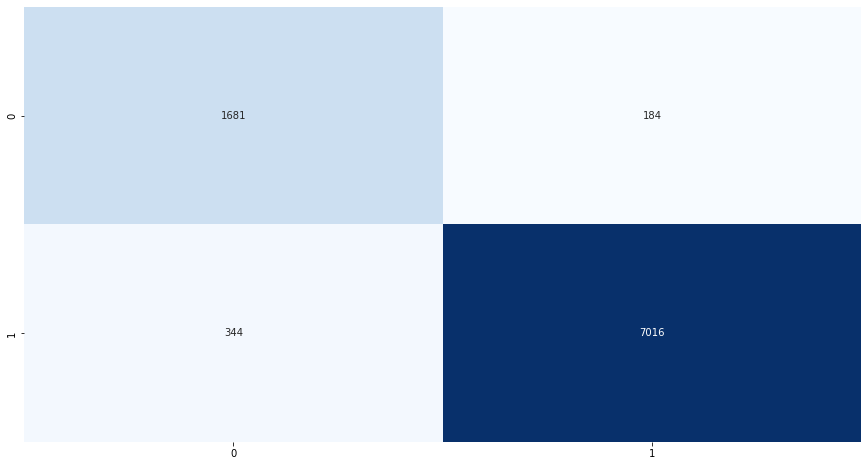

In [131]:
sns.heatmap(confusion_matrix(ytest,rf_ypred),annot=True,fmt='d',cbar=False,cmap='Blues');

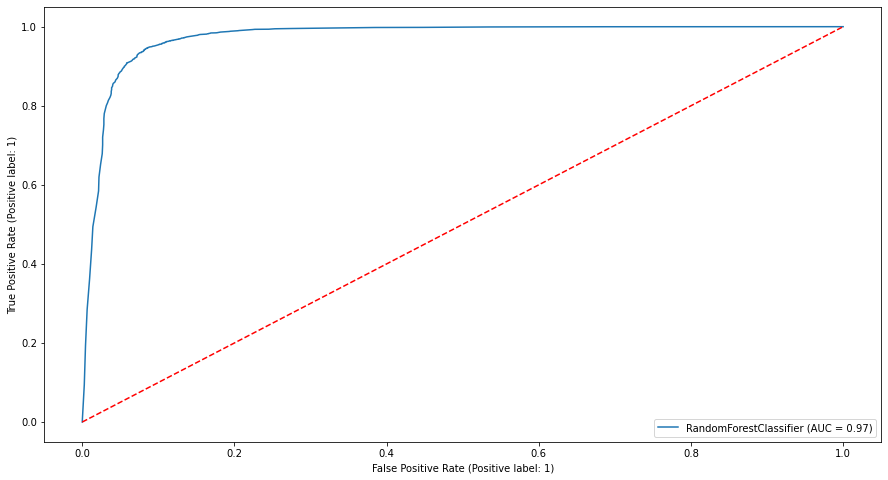

In [132]:
plot_roc_curve(estimator=rf_tuned, X = xtest, y = ytest)
plt.plot([0,1],[0,1],'r--')
plt.show()

In [133]:
cp = classification_report(ytest,rf_ypred).split()
metrics_df4 = pd.DataFrame([cp[5],cp[6],cp[7],round(accuracy_score(ytest,rf_ypred),3),round(roc_auc_score(ytest,rf_ypred),3)],
                          index=['Churn_precision','Churn_recall','Churn_f1score','Accuracy','Roc_Auc_Score'],
                         columns=['Random_Forest']).T

metrics_df2 = pd.concat([metrics_df2,metrics_df4],axis=0)
metrics_df2

,Churn_precision,Churn_recall,Churn_f1score,Accuracy,Roc_Auc_Score
Base_model,0.70,0.90,0.79,0.903,0.903
Rfe_Features_model,0.64,0.91,0.75,0.88,0.892
Decision_Tree,0.77,0.90,0.83,0.926,0.918
Random_Forest,0.83,0.90,0.86,0.943,0.927


## Boosting 

### 1.Adaboost

In [134]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50)

In [135]:
adaboost.fit(xtrain_bal,ytrain_bal)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [136]:
ypred_prob = adaboost.predict_proba(xtest)[:,1]

In [137]:
ypred = adaboost.predict(xtest)

In [138]:
print('Adaboost:')
print(classification_report(ytest,ypred))
print('Cohen Kappa Score:',round(cohen_kappa_score(ytest,ypred),2))

Adaboost:
              precision    recall  f1-score   support

           0       0.61      0.91      0.73      1865
           1       0.97      0.85      0.91      7360

    accuracy                           0.86      9225
   macro avg       0.79      0.88      0.82      9225
weighted avg       0.90      0.86      0.87      9225

Cohen Kappa Score: 0.64


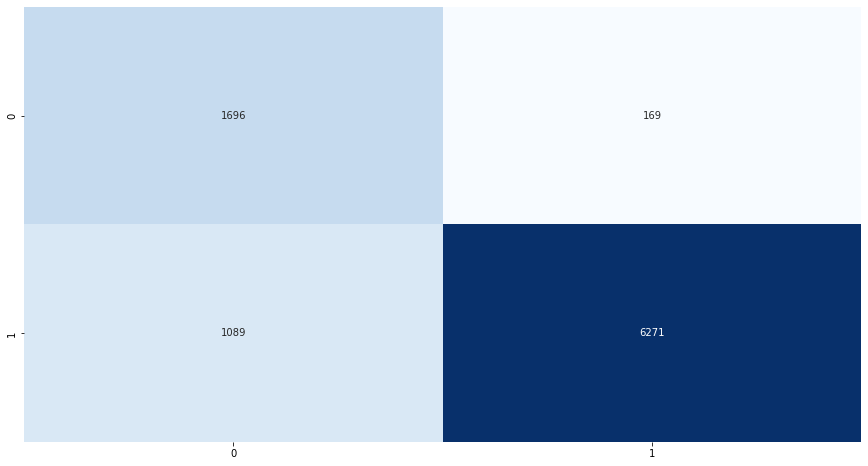

In [139]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d',cbar=False,cmap='Blues');

In [140]:
fpr,tpr,th = roc_curve(ytest,ypred_prob)

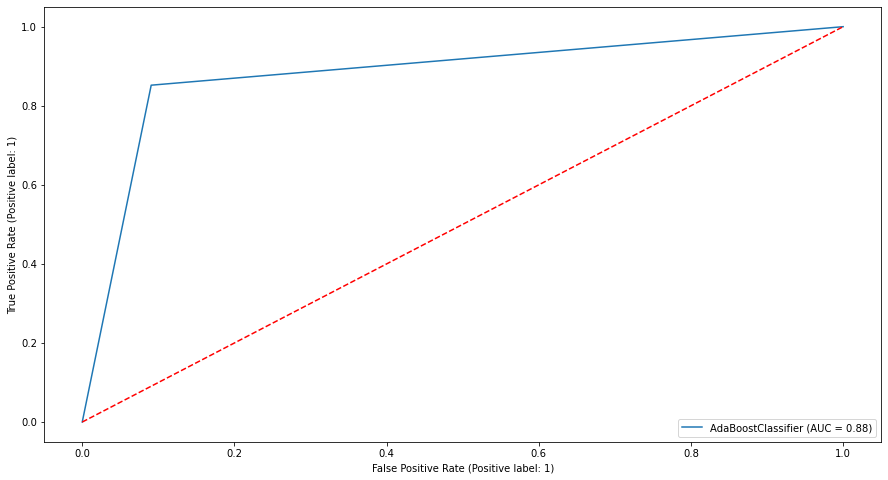

In [141]:
plot_roc_curve(estimator=adaboost,X=xtest,y=ytest)
plt.plot([0,1],[0,1],'r--')
plt.show()

In [142]:
cp = classification_report(ytest,ypred).split()
metrics_df5 = pd.DataFrame([cp[5],cp[6],cp[7],round(accuracy_score(ytest,ypred),3),round(roc_auc_score(ytest,ypred),3)],
                          index=['Churn_precision','Churn_recall','Churn_f1score','Accuracy','Roc_Auc_Score'],
                         columns=['AdaBoost']).T

metrics_df2 = pd.concat([metrics_df2,metrics_df5],axis=0)
metrics_df2

,Churn_precision,Churn_recall,Churn_f1score,Accuracy,Roc_Auc_Score
Base_model,0.70,0.90,0.79,0.903,0.903
Rfe_Features_model,0.64,0.91,0.75,0.88,0.892
Decision_Tree,0.77,0.90,0.83,0.926,0.918
Random_Forest,0.83,0.90,0.86,0.943,0.927
AdaBoost,0.61,0.91,0.73,0.864,0.881


### 2. XG Boost

In [143]:
xgb = XGBClassifier(gamma=1)

In [144]:
xgb.fit(xtrain_bal,ytrain_bal)

[17:32:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
ypred =xgb.predict(xtest)
ypred_prob = xgb.predict_proba(xtest)[:,1]

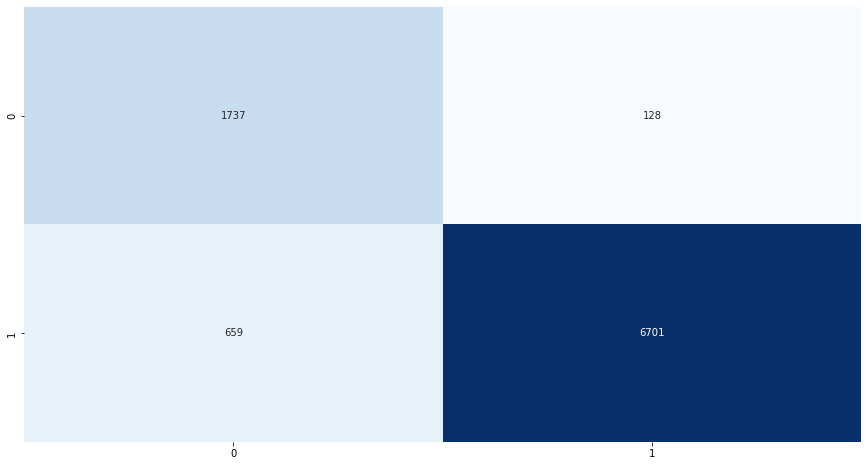

In [146]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d',cbar=False,cmap='Blues');

In [147]:
print('XG Boost')
print(classification_report(ytest,ypred))
print('COhen Kappa Score:',round(cohen_kappa_score(ytest,ypred),2))

XG Boost
              precision    recall  f1-score   support

           0       0.72      0.93      0.82      1865
           1       0.98      0.91      0.94      7360

    accuracy                           0.91      9225
   macro avg       0.85      0.92      0.88      9225
weighted avg       0.93      0.91      0.92      9225

COhen Kappa Score: 0.76


In [148]:
fpr,tpr,th = roc_curve(ytest,ypred_prob)

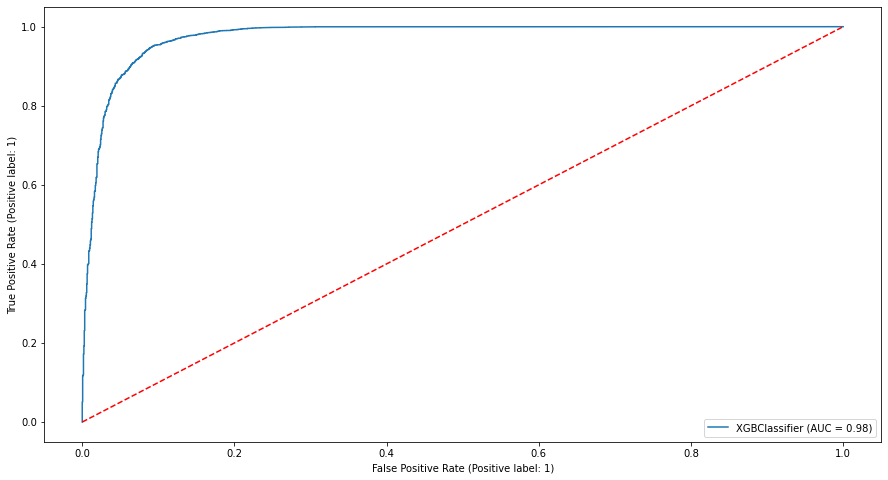

In [149]:
plot_roc_curve(estimator=xgb,X=xtest,y=ytest)
plt.plot([0,1],[0,1],'r--')
plt.show()

In [150]:
cp = classification_report(ytest,ypred).split()
metrics_df6 = pd.DataFrame([cp[5],cp[6],cp[7],round(accuracy_score(ytest,ypred),3),round(roc_auc_score(ytest,ypred),3)],
                          index=['Churn_precision','Churn_recall','Churn_f1score','Accuracy','Roc_Auc_Score'],
                         columns=['XGBoost']).T

metrics_df2 = pd.concat([metrics_df2,metrics_df6],axis=0)
metrics_df2

,Churn_precision,Churn_recall,Churn_f1score,Accuracy,Roc_Auc_Score
Base_model,0.70,0.90,0.79,0.903,0.903
Rfe_Features_model,0.64,0.91,0.75,0.88,0.892
Decision_Tree,0.77,0.90,0.83,0.926,0.918
Random_Forest,0.83,0.90,0.86,0.943,0.927
AdaBoost,0.61,0.91,0.73,0.864,0.881
XGBoost,0.72,0.93,0.82,0.915,0.921


## Stacking

In [151]:
base = [('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier())]
stack_mod = StackingClassifier(estimators=base,final_estimator=AdaBoostClassifier())
stack_mod.fit(xtrain_bal,ytrain_bal)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=AdaBoostClassifier())

In [152]:
ypred = stack_mod.predict(xtest)

In [153]:
print('Stacking:')
print(classification_report(ytest,ypred))
print('Cohen Kappa Score',round(cohen_kappa_score(ytest,ypred),2))

Stacking:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1865
           1       0.98      0.95      0.96      7360

    accuracy                           0.94      9225
   macro avg       0.90      0.93      0.91      9225
weighted avg       0.94      0.94      0.94      9225

Cohen Kappa Score 0.82


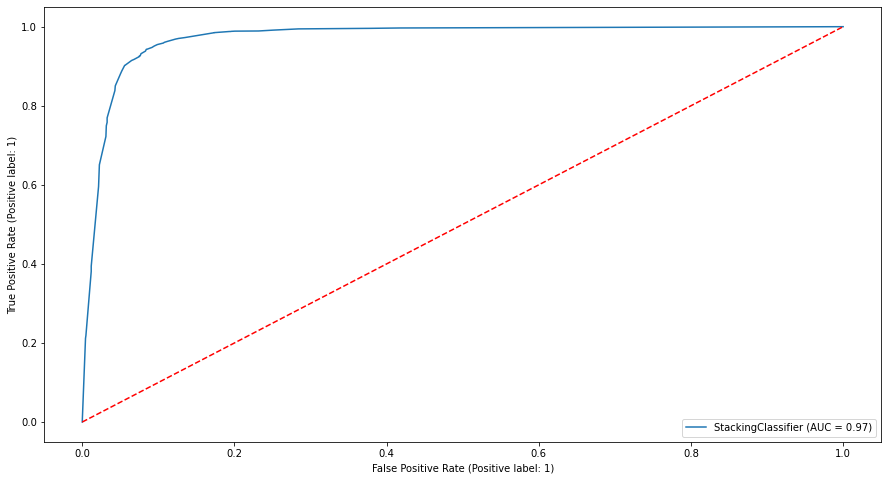

In [154]:
plot_roc_curve(estimator=stack_mod,X=xtest,y=ytest)
plt.plot([0,1],[0,1],'r--')

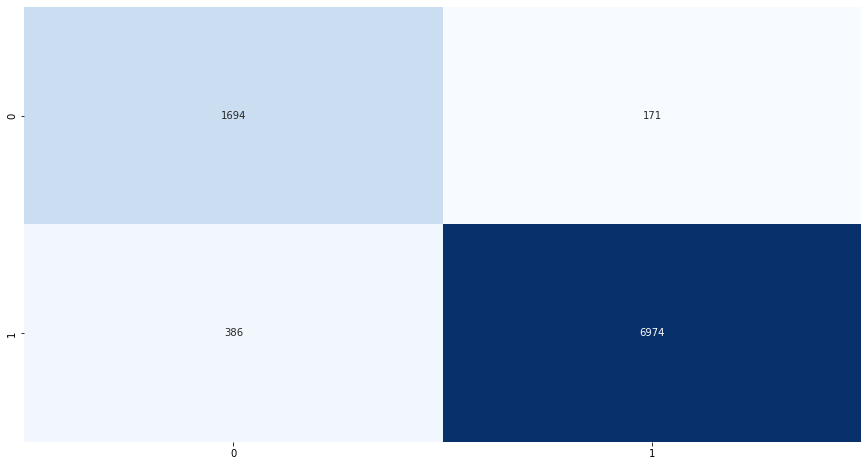

In [155]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d',cbar=False,cmap='Blues');

In [156]:
cp = classification_report(ytest,ypred).split()
metrics_df7 = pd.DataFrame([cp[5],cp[6],cp[7],round(accuracy_score(ytest,ypred),3),round(roc_auc_score(ytest,ypred),3)],
                          index=['Churn_precision','Churn_recall','Churn_f1score','Accuracy','Roc_Auc_Score'],
                         columns=['Stacking_Reg']).T

metrics_df2 = pd.concat([metrics_df2,metrics_df7],axis=0)
metrics_df2

,Churn_precision,Churn_recall,Churn_f1score,Accuracy,Roc_Auc_Score
Base_model,0.70,0.90,0.79,0.903,0.903
Rfe_Features_model,0.64,0.91,0.75,0.88,0.892
Decision_Tree,0.77,0.90,0.83,0.926,0.918
Random_Forest,0.83,0.90,0.86,0.943,0.927
AdaBoost,0.61,0.91,0.73,0.864,0.881
XGBoost,0.72,0.93,0.82,0.915,0.921
Stacking_Reg,0.81,0.91,0.86,0.94,0.928


In [157]:
metrics_df2.style.background_gradient(cmap='Blues')

,Churn_precision,Churn_recall,Churn_f1score,Accuracy,Roc_Auc_Score
Base_model,0.70,0.90,0.79,0.903000,0.903000
Rfe_Features_model,0.64,0.91,0.75,0.880000,0.892000
Decision_Tree,0.77,0.90,0.83,0.926000,0.918000
Random_Forest,0.83,0.90,0.86,0.943000,0.927000
AdaBoost,0.61,0.91,0.73,0.864000,0.881000
XGBoost,0.72,0.93,0.82,0.915000,0.921000
Stacking_Reg,0.81,0.91,0.86,0.940000,0.928000


In [158]:
metrics_df2.style.highlight_max()

,Churn_precision,Churn_recall,Churn_f1score,Accuracy,Roc_Auc_Score
Base_model,0.70,0.90,0.79,0.903000,0.903000
Rfe_Features_model,0.64,0.91,0.75,0.880000,0.892000
Decision_Tree,0.77,0.90,0.83,0.926000,0.918000
Random_Forest,0.83,0.90,0.86,0.943000,0.927000
AdaBoost,0.61,0.91,0.73,0.864000,0.881000
XGBoost,0.72,0.93,0.82,0.915000,0.921000
Stacking_Reg,0.81,0.91,0.86,0.940000,0.928000


## Conclusion 

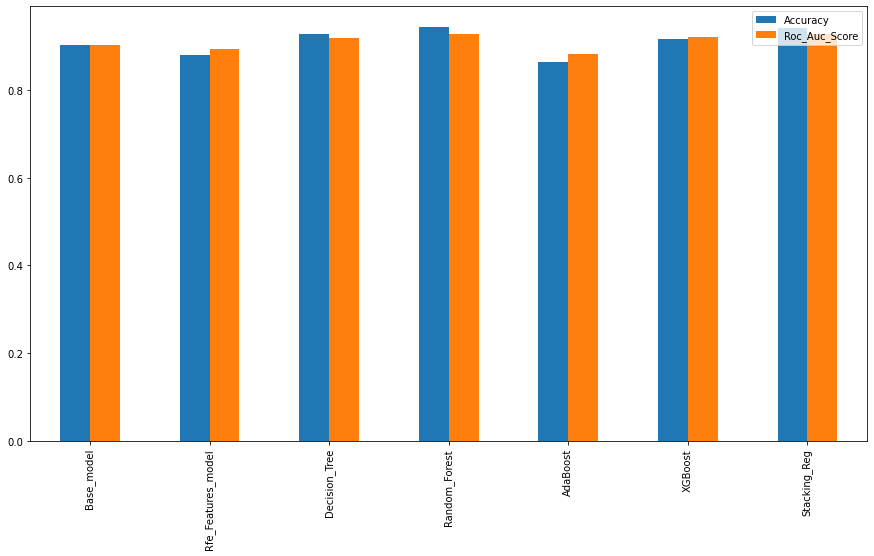

In [159]:
metrics_df2.plot(kind='bar') ;